<a href="https://colab.research.google.com/github/Tower5954/TensorFlow/blob/main/03_Introduction_to_computer_vision_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Convolutional Neural Networks and Computer Vision with TensorFlow.

Computer vision is the practice of writing algorithms which can discover patterns in visual data. Such as the camera of a self-driving car recognising the car in-front 

## Get the data.

In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip 

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2021-11-26 06:52:07--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.204.128, 64.233.189.128, 108.177.125.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.204.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109579078 (105M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.50M   184MB/s    in 0.6s    

2021-11-26 06:52:08 (184 MB/s) - ‘pizza_steak.zip’ saved [109579078/109579078]



🔑**Note:**🔑 We start with smaller datasets so we can experiment quickly and figure what works (or better yet, what does not work) before scaling up. 

## Inspect the data (become one with it).

A very crucial step at the beginning of any machine learning project is becoming one with the data.

For a computer vision project...this usually involves visualising many samples of the data. 

In [ ]:
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/train

pizza  steak


In [ ]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [ ]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 1 images in 'pizza_steak'.
There are 2 directories and 1 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 2 directories and 1 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.


In [ ]:
# The extra file in the pizza_steak directory is ".DS_Store"
!ls -la pizza_steak

total 24
drwxr-xr-x 4 root root 4096 Nov 26 06:52 .
drwxr-xr-x 1 root root 4096 Nov 26 06:52 ..
-rw-r--r-- 1 root root 6148 Nov 26 06:52 .DS_Store
drwxr-xr-x 4 root root 4096 Nov 26 06:52 test
drwxr-xr-x 4 root root 4096 Nov 26 06:52 train


In [ ]:
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

To visualise the images, first let us get the class names programmatically.

In [ ]:
# Get the classnames programmatically

import pathlib
import numpy as np

data_dir = pathlib.Path("pizza_steak/train")

class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Craeted a list of classnames from the subdirectories

print(class_names)

['.DS_Store' 'pizza' 'steak']


In [ ]:
import pathlib
import numpy as np

data_dir = pathlib.Path("pizza_steak/train")

class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Craeted a list of classnames from the subdirectories
class_names = class_names[1:]
print(class_names)

['pizza' 'steak']




Visualise our images.

In [11]:
import matplotlib.pyplot as plt
import matplotlib.image as mping
import random


def view_random_image(target_dir, target_class):
  # Set up the target directory (we will view the images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1) 
  print(random_image)

  # Read in the image using matplotlib
  img = mping.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");


  print(f"Image shape: {img.shape}") # Show the shape of the image

  return img

View a random image from the training set

['1313316.jpg']
Image shape: (384, 512, 3)


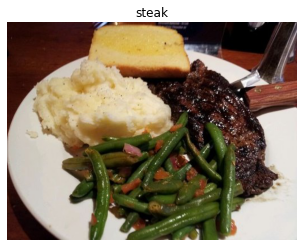

In [ ]:
img = view_random_image(target_dir="pizza_steak/train/", target_class="steak")

['464388.jpg']
Image shape: (308, 512, 3)


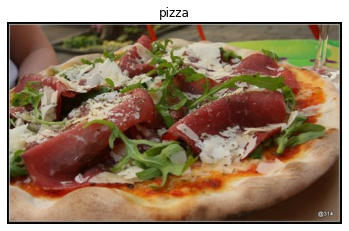

In [ ]:
img = view_random_image(target_dir="pizza_steak/train/", target_class="pizza")

In [ ]:
img.dtype

dtype('uint8')

In [ ]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(308, 512, 3), dtype=uint8, numpy=
array([[[ 0,  8,  7],
        [ 0,  2,  2],
        [ 7,  8, 10],
        ...,
        [ 0,  1,  0],
        [ 0,  1,  0],
        [ 1,  5,  4]],

       [[ 5, 11, 11],
        [ 2,  6,  7],
        [ 6,  8,  7],
        ...,
        [ 1,  3,  0],
        [ 3,  7,  6],
        [ 2,  6,  5]],

       [[ 0,  2,  2],
        [ 0,  4,  3],
        [ 0,  0,  0],
        ...,
        [ 7,  9,  6],
        [ 3,  5,  4],
        [ 0,  1,  0]],

       ...,

       [[15, 11, 10],
        [12,  8,  7],
        [ 3,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 3,  3,  3],
        [ 3,  3,  3]],

       [[ 1,  0,  0],
        [ 5,  4,  2],
        [ 7,  6,  4],
        ...,
        [ 2,  2,  2],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 5,  3,  4],
        [ 5,  4,  2],
        [ 1,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 1,  1,  1],
        [ 6,  6,  6]]], dtype=uint8)>

In [ ]:
# View the image shape

img.shape # returns width, height, colour channels

(308, 512, 3)

🔑 **Note:** 🔑 Many machine learning models, including neural networks prefer the values they work with to be 0 & 1. Knowing this, one of the most common preprocessing steps for working with images is to **scale** (also referred to as **normalisation**) the pixel values by dividing the image arrays by 255 (since 255 is the maximum pixel value).

In [ ]:
# Get all the pixel values between 0 & 1
img/255.

array([[[0.        , 0.03137255, 0.02745098],
        [0.        , 0.00784314, 0.00784314],
        [0.02745098, 0.03137255, 0.03921569],
        ...,
        [0.        , 0.00392157, 0.        ],
        [0.        , 0.00392157, 0.        ],
        [0.00392157, 0.01960784, 0.01568627]],

       [[0.01960784, 0.04313725, 0.04313725],
        [0.00784314, 0.02352941, 0.02745098],
        [0.02352941, 0.03137255, 0.02745098],
        ...,
        [0.00392157, 0.01176471, 0.        ],
        [0.01176471, 0.02745098, 0.02352941],
        [0.00784314, 0.02352941, 0.01960784]],

       [[0.        , 0.00784314, 0.00784314],
        [0.        , 0.01568627, 0.01176471],
        [0.        , 0.        , 0.        ],
        ...,
        [0.02745098, 0.03529412, 0.02352941],
        [0.01176471, 0.01960784, 0.01568627],
        [0.        , 0.00392157, 0.        ]],

       ...,

       [[0.05882353, 0.04313725, 0.03921569],
        [0.04705882, 0.03137255, 0.02745098],
        [0.01176471, 0

## An end-to-end example.


We will build a convolutional neural network to find patterns in our images, more specifically we need a way to: 
* Load the images
* Preprocess the images 
* Build a CNN to find patterns in our images
* Compile the CNN 
* Fit the CNN to the training data 

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Set the seed 
tf.random.set_seed(42)

# Preprocess data (get all the pixel values between 0 and 1, also called scaling/normalisation)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Set up paths to the directories 
train_dir = "/content/pizza_steak/train"
test_dir = "pizza_steak/test"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(244, 244),
                                               class_mode="binary",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(244, 244),
                                               class_mode="binary",
                                               seed=42)

# Build a CNN model (This is the same model as the Tiny VGG on the CNN explainer website)
model_1 = tf.keras.Sequential([
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3,
                         activation="relu",
                         input_shape=(244, 244, 3)),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, padding="valid"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the CNN 
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model 
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 25s 263ms/step - loss: 0.5259 - accuracy: 0.7433 - val_loss: 0.4220 - val_accuracy: 0.8120
Epoch 2/5
47/47 [==============================] - 11s 244ms/step - loss: 0.4020 - accuracy: 0.8167 - val_loss: 0.3505 - val_accuracy: 0.8480
Epoch 3/5
47/47 [==============================] - 11s 240ms/step - loss: 0.3878 - accuracy: 0.8240 - val_loss: 0.3437 - val_accuracy: 0.8440
Epoch 4/5
47/47 [==============================] - 12s 245ms/step - loss: 0.3346 - accuracy: 0.8673 - val_loss: 0.3129 - val_accuracy: 0.8700
Epoch 5/5
47/47 [==============================] - 12s 256ms/step - loss: 0.3174 - accuracy: 0.8647 - val_loss: 0.3177 - val_accuracy: 0.8740


🔑 **Note:** 🔑 If the above cell is taking longer than ~1 minute per epoch, make sure that you are using a GPU by going to Runtime -> Change Runtime type -> Hardware Accelarator -> GPU.
(You may have to rerun the cells above). 

In [ ]:
# Without a GPU
# 47/47 [==============================] - 126s 3s/step - loss: 0.5639 - accuracy: 0.7193 - val_loss: 0.4292 - val_accuracy: 0.8400

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 242, 242, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 240, 240, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 120, 120, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 118, 118, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 116, 116, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 58, 58, 10)       0         
 2D)                                                    

## Using the same model as before.

---

Replicate the model built in a previous section, to see if it will work with image data.

The model we will build is from the [TensorFlow playground](https://playground.tensorflow.org/#activation=relu&batchSize=30&dataset=gauss&regDataset=reg-plane&learningRate=0.0001&regularizationRate=0&noise=0&networkShape=5,6,6,2&seed=0.34082&showTestData=true&discretize=false&percTrainData=80&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false).


In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model to replicate the TensorFlow Playground model
model_2 = tf.keras.Sequential([
  tf.keras.layers.Flatten(), # dense layers expect a 1-dimensional vector as input
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_2.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_2 = model_2.fit(train_data, # use same training data created above
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data, # use same validation data created above
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 11s 222ms/step - loss: 0.7165 - accuracy: 0.5067 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 10s 212ms/step - loss: 0.6932 - accuracy: 0.4787 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 10s 213ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 10s 209ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 10s 211ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000


In [ ]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, None)              0         
                                                                 
 dense_1 (Dense)             (None, 4)                 714436    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 714,461
Trainable params: 714,461
Non-trainable params: 0
_________________________________________________________________


In [ ]:
train_data

Despite having more than 20x more parameters than our CNN (model_1), model_2 performs terribly

**model_3**

In [ ]:
# set random seed 
tf.random.set_seed(42)

# Create a model (same as the previous model but tweeked)
model_3 = tf.keras.Sequential([
                  tf.keras.layers.Flatten(),
                  tf.keras.layers.Dense(100, activation='relu'),
                  tf.keras.layers.Dense(100, activation='relu'),
                  tf.keras.layers.Dense(100, activation='relu'),
                  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_3.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model 
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data, 
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 11s 218ms/step - loss: 2.9765 - accuracy: 0.6487 - val_loss: 2.7168 - val_accuracy: 0.5460
Epoch 2/5
47/47 [==============================] - 10s 208ms/step - loss: 1.1871 - accuracy: 0.6933 - val_loss: 0.6392 - val_accuracy: 0.7780
Epoch 3/5
47/47 [==============================] - 10s 208ms/step - loss: 0.9600 - accuracy: 0.6833 - val_loss: 0.5852 - val_accuracy: 0.7840
Epoch 4/5
47/47 [==============================] - 10s 209ms/step - loss: 0.5048 - accuracy: 0.7800 - val_loss: 0.4283 - val_accuracy: 0.8060
Epoch 5/5
47/47 [==============================] - 10s 214ms/step - loss: 0.4756 - accuracy: 0.7847 - val_loss: 0.5365 - val_accuracy: 0.7540


In [ ]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, None)              0         
                                                                 
 dense_4 (Dense)             (None, 100)               17860900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 17,881,201
Trainable params: 17,881,201
Non-trainable params: 0
_________________________________________________________________


In [ ]:
17881201/36651

487.8775749638482

`model_3` has nearly 500 times more parameters than `model_1`. However, `model_1` still performs better.

🔑 **Note:** 🔑 You may think of a trainable parameter as **patterns a model can learn from data.** Intuitevely, you may think more are better. In a lot of cases, it is. However, in this case, the difference is the two different styles of models that we are using. Where a series of dense layers has a number of different learnable parameters connected to one another and hence a number of possible learning patterns, **a convolutional neural network seeks to sort out and learn the most important patterns in an image.** So even though, there are less learnable parameters in our convolutional neural network, these are often more helpful in dechiphering between different **features** in an image. 

## Binary classification: Breaking it down.



---

1. Become one with the data (visualise, visualise, visualise).
2. Preprocess the data (prepare it for the model, the main step is to scale/normalise and turning the data into batches).
3. Create a model (start with a baseline).
4. Fit the model.
5. Evaluate the model.
6. Adjust different parameters and improve the model (try to better the baseline).
7. Repeat until satisfied (Experiment, experiment, experiment).



---








### 1.Become one with the data.



['2625330.jpg']
Image shape: (512, 512, 3)
['1407753.jpg']
Image shape: (512, 384, 3)


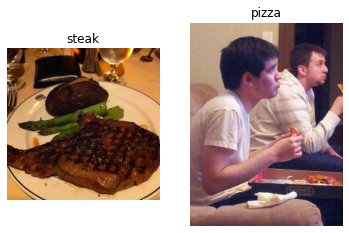

In [ ]:
# Visualise the data

plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image('pizza_steak/train/', 'steak')

plt.subplot(1, 2, 2)
pizza_img = view_random_image('pizza_steak/train/', 'pizza')



### 2.Preprocess the data (prepare it for a model).

In [ ]:
# Define the directory dataset paths
train_dir = 'pizza_steak/train/'
test_dir = 'pizza_steak/test/'

The next step is to turn the data into **batches**.

A batch is a small subset of data. Rather than look at the full dataset's images all at one time, a model may only look at 32 at one time. 

It does this for a few reasons:    
1. 10,000 images (or more) may not fit in the memory of the processor (GPU)


```
!nvidia-smi
```
2. Trying to learn the pattern in 10,000 images in one go, could result in the model not performing/learning very well.

**Why 32?**

Because 32 is good for your health...
[Yann Lecun](https://twitter.com/ylecun/status/989610208497360896?s=20)





In [ ]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

[ImageDataGenerator](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator)





In [ ]:
# Load in the image data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(244,244),   # Target size of images(height, width)
                                               class_mode='binary',     # Type of data you are working with
                                               batch_size=32)           # Size of minibatches to load data into.

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(244,244),
                                             class_mode='binary',
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


Get a sample of train data batch.

In [ ]:
images, labels = train_data.next() # get the 'next' batch of images/labels in train data  
len(images), len(labels)

(32, 32)

How many batches are there?

In [ ]:
len(train_data)

47

In [ ]:
1500/32

46.875

Get the first two images and the check the shape

In [ ]:
images[:2], images[0].shape

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.4784314 , 0.427451  , 0.3647059 ],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.8313726 , 0.70980394, 0.48627454],
          [0.8431373 , 0.73333335, 0.5372549 ],
          [0.87843144, 0.7725491 , 0.5882353 ]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.5058824 ],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.49411768],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.78039

View the first batch of labels.

In [ ]:
labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

### 3.Create a model (start with a baseline).

A base line is a relatively simple model or existing result that you setup when beginning a machine learning experimentand then as you keep experimenting, you try to beat the baseline.

> 🔑 **Note**: 🔑 In deep learning, there is almost an infinite amount of architectures you could create. So one of the best ways to get started is to start with something simple and see if it works on your data and then introduce complexity as required (e.g. look at which current model is performing best in the fieldfor your problem).

Make the creating of our model a little easier

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

Create the model (This will be our baseline, a layer convolutional neural network)

In [ ]:
model_4 = Sequential([ 
      Conv2D(filters=10,
             kernel_size=3,
             strides=1,
             padding='valid',
             activation='relu'),
      Conv2D(10, 3, activation='relu'),
      Conv2D(10, 3, activation='relu'),
      Flatten(),
      Dense(1, activation='sigmoid')

])

Compile the model

In [ ]:
model_4.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

### 4.Fit the model.

Check the lengths of training and test data generators.

In [ ]:
len(train_data), len(test_data)

(47, 16)

In [ ]:
# Fit the model 

history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data)
                        )

Epoch 1/5
47/47 [==============================] - 13s 257ms/step - loss: 2.2114 - accuracy: 0.6140 - val_loss: 0.5133 - val_accuracy: 0.7220
Epoch 2/5
47/47 [==============================] - 11s 243ms/step - loss: 0.4587 - accuracy: 0.7913 - val_loss: 0.4094 - val_accuracy: 0.8200
Epoch 3/5
47/47 [==============================] - 11s 240ms/step - loss: 0.3376 - accuracy: 0.8600 - val_loss: 0.3814 - val_accuracy: 0.8440
Epoch 4/5
47/47 [==============================] - 11s 242ms/step - loss: 0.1919 - accuracy: 0.9307 - val_loss: 0.3793 - val_accuracy: 0.8500
Epoch 5/5
47/47 [==============================] - 11s 243ms/step - loss: 0.0805 - accuracy: 0.9760 - val_loss: 0.4249 - val_accuracy: 0.8240


Get the summary of the model. 

In [ ]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, None, None, 10)    280       
                                                                 
 conv2d_5 (Conv2D)           (None, None, None, 10)    910       
                                                                 
 conv2d_6 (Conv2D)           (None, None, None, 10)    910       
                                                                 
 flatten_3 (Flatten)         (None, None)              0         
                                                                 
 dense_8 (Dense)             (None, 1)                 566441    
                                                                 
Total params: 568,541
Trainable params: 568,541
Non-trainable params: 0
_________________________________________________________________


### 5.Evaluate the model.

The model looks like it is learning something. We will now evaluate the model.


Plotting the training curves: 

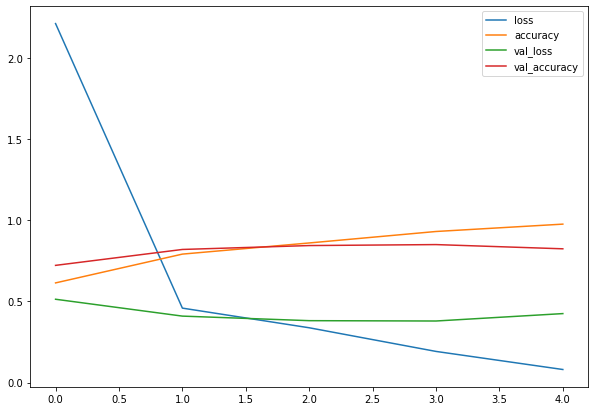

In [ ]:
import pandas as pd

pd.DataFrame(history_4.history).plot(figsize=(10, 7));

Plot the validatation and training curve seperately.

In [12]:
def plot_loss_curves(history):
  """ 
  Returns seperate loss curves for training and validation metrics.
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]


  epochs = range(len(history.history["loss"]))

  # Plot loss.
  plt.plot(epochs, loss, label="training loss")
  plt.plot(epochs, val_loss, label="val loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend();

  # Plot the accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="accuracy")
  plt.plot(epochs, val_accuracy, label="val accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend();

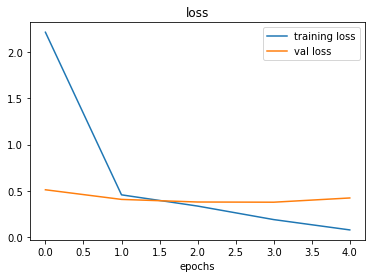

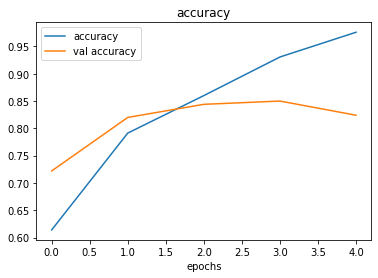

In [ ]:
plot_loss_curves(history_4)

🔑 **Note** 🔑 When a model's **validation loss starts to increase**, it is likely that the model is **overfitting** the training dataset. This means, it is learning the patterns in the training dataset *too well* and thus the model's ability to generalise the unseen data diminishes.


Ideally the two loss curves (training and validation) will be very similar to one another (training loss and validation loss decreasing at similar rates), when there is large differences, the model is **overfitting**.

### 6.Adjust the models parameters.



---


Fitting a machine learning model, comes in 3 steps:

0. Create a baseline.
1. Beat the baseline by overfitting a larger model.
2. Reduce overfitting.



---



---


Ways to induce overfitting:

* Increase the number of conv layers.
* Increase the number of conv filters.
* Add another dense layer to the output of the model's flattend layer.


Ways to reduce overfitting: 

* Add data augmentation.
* Add regularization layers (such as MaxPool2D).
* Add more data...

In [ ]:
# Create the model (This will be our new baseline)

model_5 = Sequential([
      Conv2D(10, 3, activation='relu'),
      MaxPool2D(pool_size=2),
      Conv2D(10, 3, activation='relu'),
      MaxPool2D(),
      Conv2D(10, 3, activation='relu'),
      MaxPool2D(),
      Flatten(),
      Dense(1, activation='sigmoid')
])

In [ ]:
# Compile the model

model_5.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [ ]:
# Fit the model

history_5 = model_5.fit(train_data,
                        epochs=5, 
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(valid_data)
                        )

Epoch 1/5
47/47 [==============================] - 11s 224ms/step - loss: 0.6101 - accuracy: 0.6780 - val_loss: 0.4520 - val_accuracy: 0.7940
Epoch 2/5
47/47 [==============================] - 10s 216ms/step - loss: 0.4962 - accuracy: 0.7780 - val_loss: 0.4042 - val_accuracy: 0.8280
Epoch 3/5
47/47 [==============================] - 10s 214ms/step - loss: 0.4552 - accuracy: 0.7973 - val_loss: 0.3968 - val_accuracy: 0.8240
Epoch 4/5
47/47 [==============================] - 10s 215ms/step - loss: 0.4172 - accuracy: 0.8127 - val_loss: 0.3441 - val_accuracy: 0.8700
Epoch 5/5
47/47 [==============================] - 10s 220ms/step - loss: 0.3858 - accuracy: 0.8300 - val_loss: 0.3743 - val_accuracy: 0.8360


In [ ]:
# Get a summary

model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, None, None, 10)    280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, None, None, 10)   0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, None, None, 10)    910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, None, None, 10)   0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, None, None, 10)    910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, None, None, 10)  

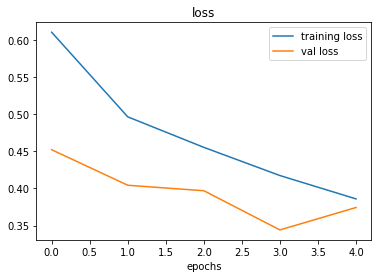

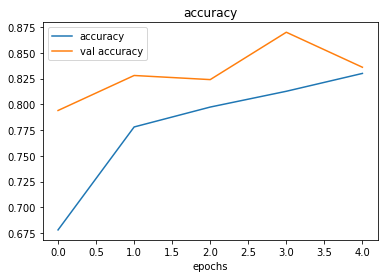

In [ ]:
# Plot loss curves

plot_loss_curves(history_5)

#### Finding data augmentation

Create ImageDataGenerator training instance **with** data augmentation

In [ ]:
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.3,
                                             horizontal_flip=True
                                             )

Create ImageDataGenerator training instance **without** data augmentation

In [ ]:
train_datagen = ImageDataGenerator(rescale=1/255.,
                                   )

Create ImageDataGenerator training instance **without** data augmentation for the test data

In [ ]:
test_datagen = ImageDataGenerator(rescale=1/255.)

🤔 What is data augmentation?



> Data augmentation is the process of altering our training data, leading it to have more diversity and in turn allowing our models to learn more generalisation (hopefully) in the patterns. Altering might mean adjusting the rotation of an image, flipping it, cropping it or something similar.



Import data and augment it from training directory.


In [ ]:
print("Augmented training data:")

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224,224),
                                                                   batch_size=32,
                                                                   class_mode="binary",
                                                                   shuffle=False) # For demonstartion purposes only


# Create non-augmented train data batches
print("Non-augmented training data:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode="binary",
                                               shuffle=False)


IMG_SIZE = (224,224)
# Create non-augmented test data batches
print("Non-augmented test data:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(IMG_SIZE),
                                             batch_size=32,
                                             class_mode="binary")

Augmented training data:
Found 1500 images belonging to 2 classes.
Non-augmented training data:
Found 1500 images belonging to 2 classes.
Non-augmented test data:
Found 500 images belonging to 2 classes.


🔑 **Note**: 🔑 Data augmentation is only really used on the training data. Using `ImageDataGenerator` built-in data augmentation parameters our images are left as they are in the directories but are modified as they're loaded into the model.

**Examples of some augmented data**

In [ ]:
# Get sample data batches
images, labels = train_data.next()

augmented_images, augmented_labels = train_data_augmented.next()  # Labels aren't augmented. Only data(images).


Show original image and the augmented image.

Showing image number: 30


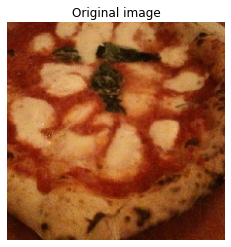

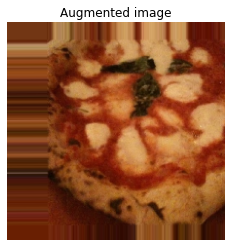

<Figure size 432x288 with 0 Axes>

In [ ]:
random_number = random.randint(0, 31) # The batch size is 32...
print(f"Showing image number: {random_number}")
plt.imshow(images[random_number])
plt.title("Original image")
plt.axis(False)
plt.figure()

plt.imshow(augmented_images[random_number])
plt.title("Augmented image")
plt.axis(False)
plt.figure();

Showing image number: 9


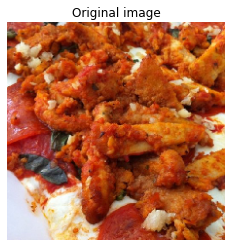

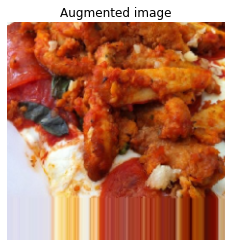

<Figure size 432x288 with 0 Axes>

In [ ]:
random_number = random.randint(0, 31) # The batch size is 32...
print(f"Showing image number: {random_number}")
plt.imshow(images[random_number])
plt.title("Original image")
plt.axis(False)
plt.figure()

plt.imshow(augmented_images[random_number])
plt.title("Augmented image")
plt.axis(False)
plt.figure();

Showing image number: 14


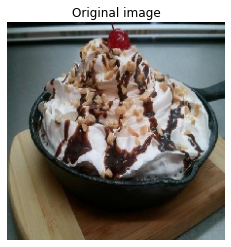

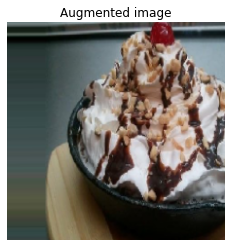

<Figure size 432x288 with 0 Axes>

In [ ]:
random_number = random.randint(0, 31) # The batch size is 32...
print(f"Showing image number: {random_number}")
plt.imshow(images[random_number])
plt.title("Original image")
plt.axis(False)
plt.figure();

plt.imshow(augmented_images[random_number])
plt.title("Augmented image")
plt.axis(False)
plt.figure();

Now that we have saw what augmented training data looks like, we will build a model to see how it learns on augmented data.

In [ ]:
# Create a model (same as model_5)

model_6 = Sequential([
          Conv2D(10, 3, activation='relu'),
          MaxPool2D(pool_size=2),
      Conv2D(10, 3, activation='relu'),
      MaxPool2D(),
      Conv2D(10, 3, activation='relu'),
      MaxPool2D(),
      Flatten(),
      Dense(1, activation='sigmoid')
])

# Compile the model
model_6.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=["accuracy"])


# Fit the model

history_6 = model_6.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 25s 520ms/step - loss: 0.7083 - accuracy: 0.5120 - val_loss: 0.6852 - val_accuracy: 0.7120
Epoch 2/5
47/47 [==============================] - 24s 521ms/step - loss: 0.6970 - accuracy: 0.4847 - val_loss: 0.6745 - val_accuracy: 0.6120
Epoch 3/5
47/47 [==============================] - 24s 514ms/step - loss: 0.7239 - accuracy: 0.6087 - val_loss: 0.6180 - val_accuracy: 0.7180
Epoch 4/5
47/47 [==============================] - 25s 523ms/step - loss: 0.6761 - accuracy: 0.6360 - val_loss: 0.6153 - val_accuracy: 0.7860
Epoch 5/5
47/47 [==============================] - 25s 523ms/step - loss: 0.6543 - accuracy: 0.6527 - val_loss: 0.5674 - val_accuracy: 0.7520


Check the models training curves

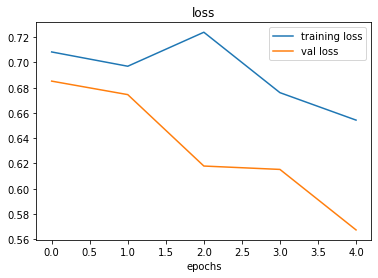

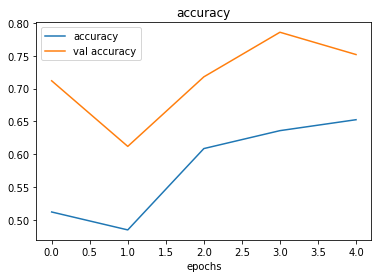

In [ ]:
plot_loss_curves(history_6)

Now shuffle the augmented training data and train another model (the same as before) on the shuffled data.

In [ ]:
# Import data, augment it and shuffle from the training directory
# train_data_augmented_shuffle = train_datagen_augmented.flow_from_directory(train_dir,
#                                                                           target_size=(244, 244),
#                                                                           class_mode="binary",
#                                                                           batch_size=32,
#                                                                           )



In [ ]:
# Create a model (same as model_5 and model_6)
# model_7 = Sequential([
#       Conv2D(10, 3, activation='relu', ),
#       MaxPool2D(),
#       Conv2D(10, 3, activation='relu'),
#       MaxPool2D(),
#       Conv2D(10, 3, activation='relu'),
#       MaxPool2D(),
#       Flatten(),
#       Dense(1, activation='sigmoid')
#                     ])





In [ ]:
# Compile the model
# model_7.compile(loss='binary_crossentropy',
#                 optimizer=Adam(),
#                 metrics=['accuracy'])


In [ ]:
# Fit the model

# history_7 = model_7.fit(train_data_augmented_shuffle,
#                         epochs=5,
#                         steps_per_epoch=len(train_data_augmented_shuffle),
#                         validation_data=test_data,
#                         validation_steps=len(test_data))



In [ ]:
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224,224),
                                                                   batch_size=32,
                                                                   class_mode="binary"
                                                                   )

Found 1500 images belonging to 2 classes.


In [ ]:
# Create a model (same as model_5)

model_7 = Sequential([
          Conv2D(10, 3, activation='relu'),
          MaxPool2D(pool_size=2),
      Conv2D(10, 3, activation='relu'),
      MaxPool2D(),
      Conv2D(10, 3, activation='relu'),
      MaxPool2D(),
      Flatten(),
      Dense(1, activation='sigmoid')
])

# Compile the model
model_7.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=["accuracy"])


# Fit the model

history_7 = model_7.fit(train_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 25s 528ms/step - loss: 0.6456 - accuracy: 0.6173 - val_loss: 0.5569 - val_accuracy: 0.7340
Epoch 2/5
47/47 [==============================] - 24s 508ms/step - loss: 0.5930 - accuracy: 0.6827 - val_loss: 0.4567 - val_accuracy: 0.7900
Epoch 3/5
47/47 [==============================] - 24s 514ms/step - loss: 0.5168 - accuracy: 0.7407 - val_loss: 0.4033 - val_accuracy: 0.8180
Epoch 4/5
47/47 [==============================] - 24s 514ms/step - loss: 0.5126 - accuracy: 0.7413 - val_loss: 0.3624 - val_accuracy: 0.8380
Epoch 5/5
47/47 [==============================] - 24s 514ms/step - loss: 0.4768 - accuracy: 0.7760 - val_loss: 0.3803 - val_accuracy: 0.8380


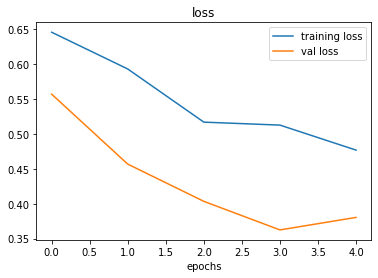

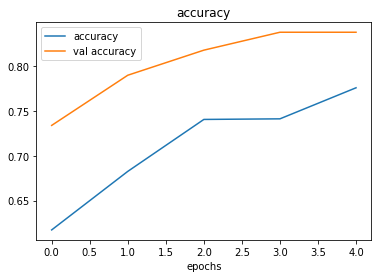

In [ ]:
plot_loss_curves(history_7)

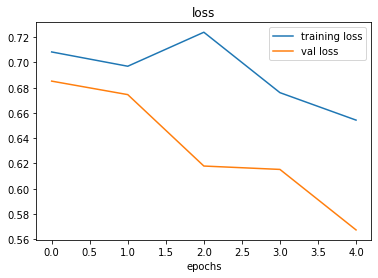

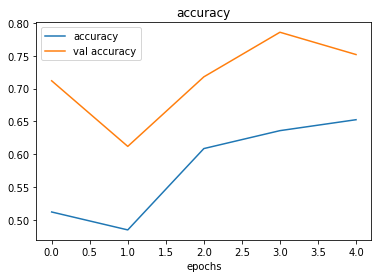

In [ ]:
plot_loss_curves(history_6)

🔑 **Note**:  🔑 When shuffling training data, the model gets exposed to all different kinds of data during training, thus enabling it to learn features across a wide array of images (in this case, pizza and steak. As opposed to pizza then steak) 

### 7.Repeat until satisfied.

We have already beaten our baseline, there are a few things we could try to continue to improve the model:     
* Increase the number of model layers (e.g. add more `Conv2D`/`MaxPool2D` layers).
* Increase the number of filters in each convolutional layer (e.g. from 10 to 32 or 64).
* Train for longer (more epochs).
* Find an ideal learning rate.
* Use **transfer learning** to leverage what another image model has learnt and adjust it for your own use case. 

In [ ]:
model_8 = Sequential([
     Conv2D(10, 3, activation='relu'),
     Conv2D(10, 3, activation='relu'),

     MaxPool2D(pool_size=2), 

     Conv2D(10, 3, activation='relu'),
     Conv2D(10, 3, activation='relu'),

     MaxPool2D(pool_size=2),
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(1, activation="sigmoid")
])

In [ ]:
model_8.compile(loss='binary_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

In [ ]:
history_8 = model_8.fit(train_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 27s 540ms/step - loss: 0.6828 - accuracy: 0.5767 - val_loss: 0.5991 - val_accuracy: 0.6320
Epoch 2/5
47/47 [==============================] - 25s 528ms/step - loss: 0.6050 - accuracy: 0.6787 - val_loss: 0.5153 - val_accuracy: 0.7360
Epoch 3/5
47/47 [==============================] - 25s 537ms/step - loss: 0.5915 - accuracy: 0.6947 - val_loss: 0.4745 - val_accuracy: 0.7880
Epoch 4/5
47/47 [==============================] - 25s 535ms/step - loss: 0.5595 - accuracy: 0.7213 - val_loss: 0.4462 - val_accuracy: 0.8020
Epoch 5/5
47/47 [==============================] - 26s 548ms/step - loss: 0.5330 - accuracy: 0.7380 - val_loss: 0.4304 - val_accuracy: 0.8060


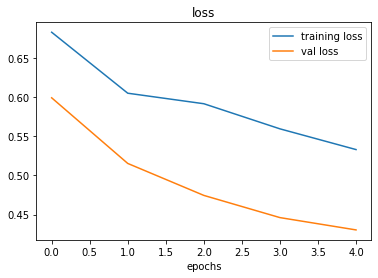

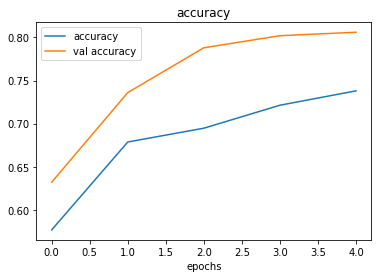

In [ ]:
plot_loss_curves(history_8)

In [ ]:
model_9 = Sequential([
     Conv2D(32, 3, activation='relu'),
     Conv2D(32, 3, activation='relu'),

     MaxPool2D(pool_size=2), 

     Conv2D(32, 3, activation='relu'),
     Conv2D(32, 3, activation='relu'),

     MaxPool2D(pool_size=2),
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(1, activation="sigmoid")
])

In [ ]:
model_9.compile(loss='binary_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

In [ ]:
history_9 = model_9.fit(train_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 31s 611ms/step - loss: 0.6856 - accuracy: 0.5527 - val_loss: 0.5432 - val_accuracy: 0.7100
Epoch 2/5
47/47 [==============================] - 26s 562ms/step - loss: 0.6048 - accuracy: 0.6733 - val_loss: 0.4843 - val_accuracy: 0.7920
Epoch 3/5
47/47 [==============================] - 26s 560ms/step - loss: 0.5429 - accuracy: 0.7273 - val_loss: 0.3741 - val_accuracy: 0.8340
Epoch 4/5
47/47 [==============================] - 27s 564ms/step - loss: 0.5290 - accuracy: 0.7427 - val_loss: 0.3349 - val_accuracy: 0.8680
Epoch 5/5
47/47 [==============================] - 27s 563ms/step - loss: 0.4945 - accuracy: 0.7727 - val_loss: 0.3674 - val_accuracy: 0.8480


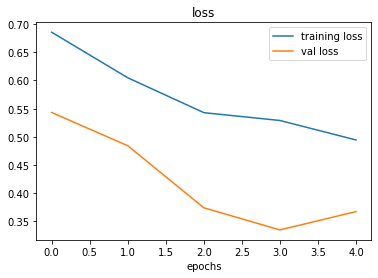

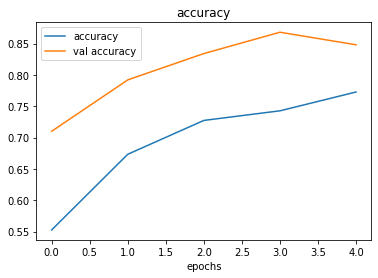

In [ ]:
plot_loss_curves(history_9)

## Making a prediction with our trained model on our own custom data. 

In [ ]:
# Classes we are working with:

print(class_names)

['pizza' 'steak']


In [ ]:
# View example image

!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg

--2021-11-26 07:10:10--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.07s   

2021-11-26 07:10:10 (26.5 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



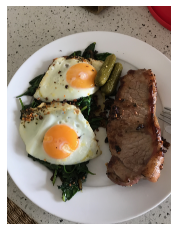

In [ ]:
import matplotlib.image as mpimg
steak = mping.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);

In [ ]:
# Check the shape of the image 

steak.shape

(4032, 3024, 3)

In [ ]:
steak

array([[[162, 158, 149],
        [163, 159, 150],
        [166, 162, 153],
        ...,
        [136,  17,  23],
        [140,  21,  27],
        [140,  21,  27]],

       [[164, 160, 151],
        [164, 160, 151],
        [164, 160, 151],
        ...,
        [133,  14,  20],
        [134,  15,  21],
        [137,  18,  24]],

       [[166, 162, 153],
        [165, 161, 152],
        [163, 159, 150],
        ...,
        [136,  17,  23],
        [134,  15,  21],
        [136,  17,  23]],

       ...,

       [[154, 132, 109],
        [142, 122,  98],
        [101,  80,  59],
        ...,
        [165, 154, 148],
        [152, 141, 135],
        [140, 129, 123]],

       [[141, 119,  95],
        [139, 117,  93],
        [106,  86,  62],
        ...,
        [158, 147, 141],
        [142, 131, 125],
        [138, 127, 121]],

       [[148, 127, 100],
        [149, 127, 103],
        [114,  94,  70],
        ...,
        [153, 142, 136],
        [138, 127, 121],
        [145, 132, 126]]

🔑 **Note**: 🔑 When training a neural network and you want to make a prediction with it on custom data. It is important that the custom data (or new data) is preprocessed into the same format as the data the model was trained on. 

Create a function to import an image and resize it, to be used in the model.

In [ ]:
def load_and_prep(filename, img_shape=224):

  """
  Reads an image from filename, turns it into a tensor and reshapes it to 
  (img_shape, img_shape, colour_channel).
  """
  # Read the image
  img = tf.io.read_file(filename)  
  # Decode the read file into a tensor
  img = tf.image.decode_image(img)
  # Resize the image
  img = tf.image.resize(img, size=[img_shape, img_shape])
  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [ ]:
steak = load_and_prep("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [ ]:
pred = model_7.predict(tf.expand_dims(steak, axis=0))

The custom image is going through the model, however, it currently outputs a prediction probability.
It would be better to visualise the image with the prediction.


In [ ]:
# Remind ourselves of the class names we are using
class_names

array(['pizza', 'steak'], dtype='<U9')

In [ ]:
# We can index the predicted class by rounding the prediction probability and indexing it on the class names

pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

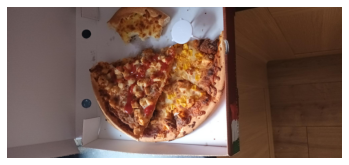

In [ ]:
pizza = mping.imread("pizza.jpg")
plt.imshow(pizza)
plt.axis(False);

In [ ]:
pizza = load_and_prep("pizza.jpg")

In [ ]:
pred_1 = model_7.predict(tf.expand_dims(pizza, axis=0))
pred_1

array([[0.57299507]], dtype=float32)

In [ ]:
pred_class = class_names[int(tf.round(pred_1))]
pred_class

'steak'

In [ ]:
def pred_and_plot(model, filename, class_name=class_names):
  """
  Imports an image located at filename, makes a prediction with
  model and plots the image with the predicted class as the title
  """
  # Import target image and process it
  img = load_and_prep(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred))]

  # Plot the img and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

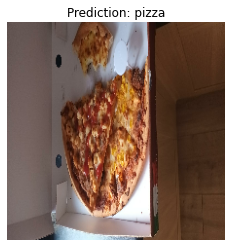

In [ ]:
# Test the model on custom image
pred_and_plot(model_9, "pizza.jpg")

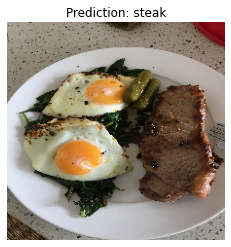

In [ ]:
pred_and_plot(model_9, "03-steak.jpeg")

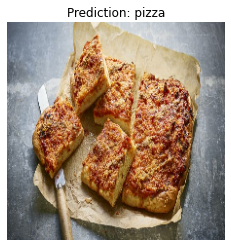

In [ ]:
pred_and_plot(model_9, "pizza_2.jpg")

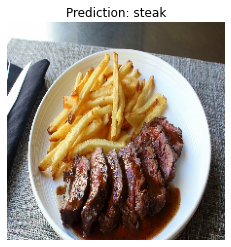

In [ ]:
pred_and_plot(model_9, "steak_01.jpg")

# Multi-class Image Classification

The previous model was a **binary classification model** (pizza vs steak).
Now we will create a **multi-classification model** with 10 different classes.

Steps for making a model:

1. Become one with the data.
2. Preprocess the data (get it ready for the model).
3. Create a model (start with a baseline).
4. Fit the model (overfit it to make sure it works).
5. Evaluate the model.
6. Adjust different hyperparameters and improve the model
(try to beat the baseline/reduce overfitting).
7. Repeat until satisfied.

## 1.Import and become one with the data.

In [3]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

--2021-11-30 10:04:32--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.137.128, 142.250.101.128, 142.250.141.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.137.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  72.5MB/s    in 7.4s    

2021-11-30 10:04:40 (66.7 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [4]:
# Unzip our data
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

In [5]:
import os

In [6]:
# Walk through 10 classes of food image data 
for dirpath, dirnames, filenames, in os.walk("10_food_classes_all_data"):
  print(f"There is: {len(dirnames)} directories.")
  print(f"There is: {len(filenames)} images in '{dirpath}'.")

There is: 2 directories.
There is: 0 images in '10_food_classes_all_data'.
There is: 10 directories.
There is: 0 images in '10_food_classes_all_data/test'.
There is: 0 directories.
There is: 250 images in '10_food_classes_all_data/test/pizza'.
There is: 0 directories.
There is: 250 images in '10_food_classes_all_data/test/chicken_curry'.
There is: 0 directories.
There is: 250 images in '10_food_classes_all_data/test/sushi'.
There is: 0 directories.
There is: 250 images in '10_food_classes_all_data/test/ice_cream'.
There is: 0 directories.
There is: 250 images in '10_food_classes_all_data/test/hamburger'.
There is: 0 directories.
There is: 250 images in '10_food_classes_all_data/test/ramen'.
There is: 0 directories.
There is: 250 images in '10_food_classes_all_data/test/steak'.
There is: 0 directories.
There is: 250 images in '10_food_classes_all_data/test/chicken_wings'.
There is: 0 directories.
There is: 250 images in '10_food_classes_all_data/test/fried_rice'.
There is: 0 directories

In [7]:
# Set up the train and test directories

train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [8]:
# Get the subdirectories (these wil be the class names).
import pathlib
import numpy as np

data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))



In [13]:
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


Visualise, visualise, visualise

['1710501.jpg']
Image shape: (512, 384, 3)


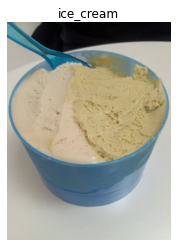

In [14]:
import random 
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names))

## 2.Preprocess the data (prepare it for the model).

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode='categorical')


test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode='categorical')




Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


## 3.Create a model (Start with a baseline).


In [16]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation

In [17]:
# Create model

model_10 = Sequential([
                       Conv2D(10, 3),                        # input_shape=(244, 244,3) took this out as it does not work with it in ???
                       Activation(activation='relu'),
                       Conv2D(10, 3, activation='relu'),
                       MaxPool2D(),
                       Conv2D(10, 3, activation='relu'),
                       Conv2D(10, 3, activation='relu'),
                       MaxPool2D(),
                       Flatten(),
                       Dense(10, activation='softmax')
])


# Compile the model

model_10.compile(loss='categorical_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

## 4.Fit the model

In [19]:
history_10 = model_10.fit(train_data,
                          epochs=5,
                          steps_per_epoch=len(train_data),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5


KeyboardInterrupt: ignored

## 5.Evaluate the model

In [ ]:
model_10.evaluate(test_data)

Check out the model's loss curve

In [ ]:
plot_loss_curves(history_10)

This shows that the model is **overfitting** the training set quite badly...
In other words, it is getting good results on the training data, but failing to 
generalise well on the unseen data and performs poorly on the test data

## 6.Adjust the models hyperparameters (to beat the baseline/reduce overfitting).

Due to its performance on the training data, it is clear that the model is learning something...

However, it is not generalising well on unseen data (overfitting).

To attempt to right this issue we can:

* **Get more data** - having more data give the model more oppurtunity
to learn diverse patterns.
* **Simplify the model** - if the current model is overfitting the data, it may be too complicated of a model, one way to simplify is to reduce the number of layers another way is to reduce the number of hidden units in the layers.
* **Use data augmentation** - data augmentation manipulates the training data in such a way to add more diversity to it (without altering the original data).
* **Use transfer learning** - transfer learning leverages the patterns another model has learned on similar data to your own and allows you to use those patterns on your own dataset.  

In [ ]:
# Simplifying the model

In [ ]:
model_10.summary